# Neural Network Tutorial

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2025-10-22 11:27:56.955351: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#Load dataset 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Creation of the neural Network

Important points

For every neural network project you will do in the future, these rules always apply.

    Start simple. Use a single layer perceptron and evaluate the result. If it is good, then proceed to deployment.
    If the previous step is not good enough, try to get your network wider and/or deeper. Add several neurons in your single-layer perceptron. Or, add one layer into the existing network. Evaluate and, if it is good, proceed to deployment. If not, then iterate by adding more neurons or layers.
    When, after adding several more layers into your network, but the results are still not good, then maybe you need to change your network architecture. Use Convolutional Neural Network (CNN) for images or Recurring Neural Network for time-series and texts.

In [4]:
#Because of our perceptron only able to read one-dimensional data, let's flatten them.
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
print(y_train.shape)
print(y_test.shape)

#Your training data x_train is transformed from 60,000 x 28 x 28 to 60,000 x 784. 
#Your testing data x_test follows suit, from 10,000 x 28 x 28 to 10,000 x 784.

(60000, 10)
(10000, 10)


For the hidden layer, let's set an arbitrary number of neurons. 

The number should be simple and small enough to follow our step number 1. Let's choose 10 neurons.

for the output layer, because we have ten categories to categorize, we need to set it to 10 output neurons.

For each image, each of these neurons will be filled with 1 if it is the correct category and 0 if not.

The output layer is called One-Hot Vector, when it is hot then the value is 1, the others should be all zeros.

# Architecture

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/melanie.benyadi@Digital-Grenoble.local/anaconda3/envs/ML5/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The Sequential model is the easiest model Keras has. The first line of model.add method is adding your hidden layer with 10 cells, coming from 784 input cells.

The second add method is adding your output layer to the network. This has 10 cells as I elaborated before.

The Relu and Softmax activation options are non-linear. Being able to use non-linear data makes Neural Network particularly useful. Generally, neural networks can map any data distribution at any level of complexity.

    Use Relu whenever possible, on every hidden layer.

    Use Softmax on output layers with more than two categories to be predicted.
    
    Use Sigmoid on an output layer with two categories.

After creating your model, call compile method to finish your model. It usually takes three parameters.

 Always use categorical_crossentropy for multi-categories, 
 
 and binary_crossentropy for two categories. 
 
 Use adam or rmsprop as the optimizer since both of them are pretty good. And you need accuracy as the metric to check your network performance.

# Training the model

In [7]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

#we will use 10% of the training data as the validation data, hence validation_split was set to 0.1.
#epochs is the number of training loops we will do. One epoch will expose all of our training data once to the network.
# More epochs means the network will know better about our data.

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7580 - loss: 0.7135 - val_accuracy: 0.8282 - val_loss: 0.5082
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8349 - loss: 0.4795 - val_accuracy: 0.8340 - val_loss: 0.4652
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8473 - loss: 0.4437 - val_accuracy: 0.8425 - val_loss: 0.4385
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 0.4255 - val_accuracy: 0.8435 - val_loss: 0.4402
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.4131 - val_accuracy: 0.8375 - val_loss: 0.4535
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8588 - loss: 0.4052 - val_accuracy: 0.8503 - val_loss: 0.4318
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3990 - val_accuracy: 0.8512 - val_loss: 0.4257
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8626 - loss: 0.3938 - 

## Testing dataset 


In [8]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8451 - loss: 0.4497
0.8450999855995178


# Accuracy 

This is a metric to measure how good the performance of your network is. 84% accuracy on test data means the network guessed right for around 8400 images from the 10K test data.

A higher accuracy on test data means a better network. If you think the accuracy should be higher, maybe you need the next step(s) in building your Neural Network.

# Make the network wider

In [9]:
model2 = Sequential()
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

#This changes the number of the hidden layer cells. We've increased these from 10 to 50.

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8129 - loss: 0.5449 - val_accuracy: 0.8527 - val_loss: 0.4316
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8578 - loss: 0.4055 - val_accuracy: 0.8603 - val_loss: 0.4032
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8675 - loss: 0.3700 - val_accuracy: 0.8603 - val_loss: 0.3997
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8755 - loss: 0.3459 - val_accuracy: 0.8657 - val_loss: 0.3904
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8816 - loss: 0.3291 - val_accuracy: 0.8667 - val_loss: 0.3714
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8846 - loss: 0.3143 - val_accuracy: 0.8728 - val_loss: 0.3490
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8891 - loss: 0.3017 - val_accuracy: 0.8745 - val_loss: 0.3514
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8938 - loss: 0.2920 - 

It proves that making a bigger network can increase the performance.

## test data

In [10]:
_, test_acc = model2.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8751 - loss: 0.3514
0.8751000165939331


# Create a deeper Network 

In [11]:
model3 = Sequential()
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8134 - loss: 0.5314 - val_accuracy: 0.8550 - val_loss: 0.4223
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8614 - loss: 0.3879 - val_accuracy: 0.8645 - val_loss: 0.3841
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.3529 - val_accuracy: 0.8707 - val_loss: 0.3563
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8797 - loss: 0.3300 - val_accuracy: 0.8675 - val_loss: 0.3659
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8834 - loss: 0.3142 - val_accuracy: 0.8717 - val_loss: 0.3509
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8896 - loss: 0.2989 - val_accuracy: 0.8733 - val_loss: 0.3433
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8926 - loss: 0.2879 - val_accuracy: 0.8765 - val_loss: 0.3512
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.2780 - 

Validation accuracy increased by 1%. A better performance.

## test data


In [12]:
_, test_acc = model3.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8754 - loss: 0.3546
0.8754000067710876


## Convolution neural network

A convolutional neural network (CNN) is a neural network that can "see " a subset of our data. 

It can detect a pattern in images better than perceptron. Read more about Convolutional Neural Network Tutorial on my blog post.

Let's just apply the CNN to our network:

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Let's import the necessary methods and reshape our training data. You can't flatten it because CNN reads our images as is.

If you check your x_train, you will have 60,000 x 28 x 28 x 1 data.

Why x 1?

The data CNN needs to read must be like this: total_data x width x height x channels.

Height and width are self-explanatory. Channels are like Red or Green or Blue in RGB images. In RGB, because there are three channels, we need to make the data x 3. But because we work with grayscale images, every value on Red, Green, or Blue channel is the same and we reduce to one channel.

## Architecture 

In [14]:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#The code is a little bit different. There are Conv2D, MaxPooling2D, and Flatten.

#These guys are the three most common layers to use in CNN.

/home/melanie.benyadi@Digital-Grenoble.local/anaconda3/envs/ML5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model4.summary()

#explian you what is in the network

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

conv2d changes your 28x28x1 image to 28x28x64. Just imagine this as 64 hidden layer cells.

MaxPooling2D reduces the width and height so that you will not need to compute all the cells. It reduces the size to 14x14x64.

Finally, flatten just flattens out the output of MaxPooling into a hidden layer of 12544 cells.



In [16]:
model4.fit(x_train, y_train, epochs=10, validation_split=0.1)



Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8509 - loss: 0.4276 - val_accuracy: 0.8768 - val_loss: 0.3370
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8923 - loss: 0.3092 - val_accuracy: 0.8968 - val_loss: 0.2932
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9019 - loss: 0.2765 - val_accuracy: 0.8982 - val_loss: 0.2887
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9089 - loss: 0.2554 - val_accuracy: 0.9005 - val_loss: 0.2770
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9144 - loss: 0.2390 - val_accuracy: 0.9038 - val_loss: 0.2706
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9198 - loss: 0.2257 - val_accuracy: 0.9010 - val_loss: 0.2793
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9243 - loss: 0.2122 - val_accuracy: 0.9048 - val_loss: 0.2706
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9268 -

The validation result is more than 90%. A single CNN layer can do this.

## test data

In [17]:
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8960 - loss: 0.2958
0.8960000276565552


Changing the architecture into a more suitable one really works. And I always suggest you do so.

# Model 5: deepe model- avec 1 couche conv2d et 1 couche pooling

In [ ]:
#Architecture

model5 = Sequential()
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model5.add(MaxPooling2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
#Train the model
model5.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9178 - loss: 0.2292 - val_accuracy: 0.9053 - val_loss: 0.2656
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9228 - loss: 0.2121 - val_accuracy: 0.9050 - val_loss: 0.2635
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9270 - loss: 0.1999 - val_accuracy: 0.9117 - val_loss: 0.2500
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9319 - loss: 0.1862 - val_accuracy: 0.9092 - val_loss: 0.2606
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9371 - loss: 0.1740 - val_accuracy: 0.9120 - val_loss: 0.2565
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9388 - loss: 0.1655 - val_accuracy: 0.8978 - val_loss: 0.3108
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9421 - loss: 0.1563 - val_accuracy: 0.9123 - val_loss: 0.2475
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9461 -

In [21]:
#evaluate test data
_, test_acc = model5.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9036 - loss: 0.2927
0.9035999774932861


The accuracy inscreases - adding layer increase the accuracy of the model.

# Model 6: Add dense layer

In [25]:
#Architecture

model6 = Sequential()
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model6.add(MaxPooling2D(pool_size=2))
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(14,14, 1))) 
model6.add(MaxPooling2D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(10, activation='relu'))
model6.add(Dense(10, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/melanie.benyadi@Digital-Grenoble.local/anaconda3/envs/ML5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#Train the model
model6.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.7688 - loss: 0.6749 - val_accuracy: 0.8255 - val_loss: 0.4455
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8539 - loss: 0.3952 - val_accuracy: 0.8733 - val_loss: 0.3548
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8825 - loss: 0.3263 - val_accuracy: 0.8857 - val_loss: 0.3095
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8955 - loss: 0.2885 - val_accuracy: 0.8970 - val_loss: 0.2849
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9036 - loss: 0.2641 - val_accuracy: 0.9037 - val_loss: 0.2713
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9117 - loss: 0.2431 - val_accuracy: 0.9008 - val_loss: 0.2729
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9176 - loss: 0.2275 - val_accuracy: 0.9092 - val_loss: 0.2525
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9217 -

In [27]:
#evaluate test data
_, test_acc = model6.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9086 - loss: 0.2717
0.9085999727249146


# Model 7: Dropout in Neural Networks

In [28]:
#Import Tensorflow for dropout 

import tensorflow as tf
from tensorflow.keras import layers, models

In [37]:
#Architechture
model7 = Sequential()
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model7.add(MaxPooling2D(pool_size=2))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(14,14, 1))) 
model7.add(MaxPooling2D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(10, activation='relu'))
model7.add(layers.Dropout(0.05)) #never put it last 
model7.add(Dense(10, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/melanie.benyadi@Digital-Grenoble.local/anaconda3/envs/ML5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#Train the model
history = model7.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7652 - loss: 0.6560 - val_accuracy: 0.8617 - val_loss: 0.3873
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8399 - loss: 0.4421 - val_accuracy: 0.8827 - val_loss: 0.3489
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8585 - loss: 0.3917 - val_accuracy: 0.8870 - val_loss: 0.3304
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8718 - loss: 0.3598 - val_accuracy: 0.8978 - val_loss: 0.2936
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8813 - loss: 0.3374 - val_accuracy: 0.9007 - val_loss: 0.2959
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8871 - loss: 0.3163 - val_accuracy: 0.9053 - val_loss: 0.2788
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8956 - loss: 0.2984 - val_accuracy: 0.9055 - val_loss: 0.2777
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8986 -

In [31]:
#evaluate test data
_, test_acc = model7.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8822 - loss: 0.3858
0.8822000026702881


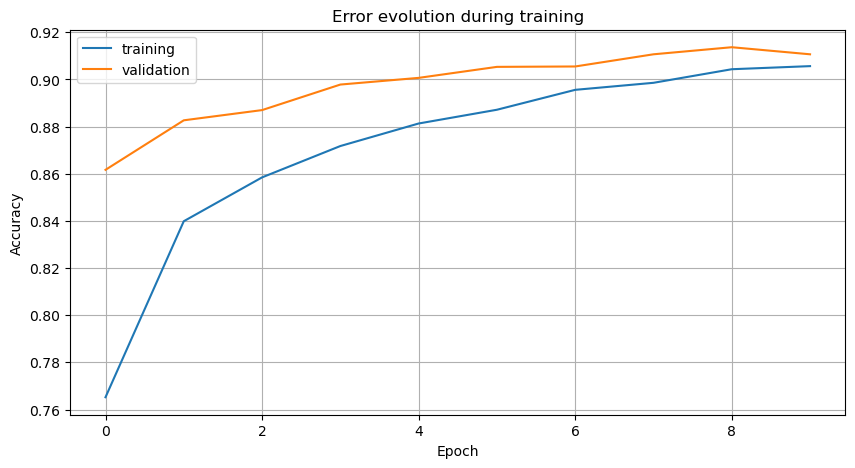

In [39]:
# visualize training and validation accuracies
import matplotlib.pyplot as plt

# Visualization of error evolution
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"],label = "training" )
plt.plot(history.history["val_accuracy"],label = "validation" )
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Error evolution during training')
plt.legend()
plt.show()

# Model 8: Artificially Increase the Dataset 

In [ ]:
#Using pretraiting layres
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

#Architechture
model8 = Sequential()
model8.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model8.add(MaxPooling2D(pool_size=2))
model8.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(14,14, 1))) 
model8.add(MaxPooling2D(pool_size=2))
model8.add(Flatten())
model8.add(Dense(10, activation='relu'))
model8.add(layers.Dropout(0.3)) #never put it last 
model8.add(Dense(10, activation='softmax'))
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])